# Exploratory Data Analysis (EDA)

### 1.Dataset Selection

#### The "Global Superstore" dataset consists of essential business metrics like Sales, Profit, Region, and Product Categories. This dataset is ideal for exploring sales trends, profitability, and market behavior across different regions and categories.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv("Global_Superstore.csv",encoding="ISO-8859-1")

In [2]:
print(df.head())

   Row ID         Order ID  Order Date   Ship Date     Ship Mode Customer ID  \
0   32298   CA-2012-124891  31-07-2012  31-07-2012      Same Day    RH-19495   
1   26341    IN-2013-77878  05-02-2013  07-02-2013  Second Class    JR-16210   
2   25330    IN-2013-71249  17-10-2013  18-10-2013   First Class    CR-12730   
3   13524  ES-2013-1579342  28-01-2013  30-01-2013   First Class    KM-16375   
4   47221     SG-2013-4320  05-11-2013  06-11-2013      Same Day     RH-9495   

      Customer Name      Segment           City            State  ...  \
0       Rick Hansen     Consumer  New York City         New York  ...   
1     Justin Ritter    Corporate     Wollongong  New South Wales  ...   
2      Craig Reiter     Consumer       Brisbane       Queensland  ...   
3  Katherine Murray  Home Office         Berlin           Berlin  ...   
4       Rick Hansen     Consumer          Dakar            Dakar  ...   

         Product ID    Category Sub-Category  \
0   TEC-AC-10003033  Technology 

### 2. Data Handling and Cleaning

In [3]:
print(df.isnull().sum())

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64


#### Missing values are handled by filling numerical data with appropriate measures and removing rows or columns with too many missing values to maintain data quality.

In [4]:
df.fillna(df.mean(), inplace=True)
df.dropna(axis=0, thresh=len(df.columns) * 0.5, inplace=True)  
df.dropna(axis=1, thresh=len(df) * 0.5, inplace=True)
print(df.isnull().sum())

C:\Users\User\AppData\Local\Temp\ipykernel_14868\794144910.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Postal Code       0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64


In [5]:
df.drop_duplicates(inplace=True)

#### Outliers are detected using the Z-score method, and any data points with a Z-score above 3 are removed to keep the dataset balanced and free from extreme values.

In [6]:
from scipy import stats

z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
threshold = 3
df = df[(z_scores < threshold).all(axis=1)]

### 3. Statistical Analysis:

#### These commands provide key statistical insights: describe() summarizes numerical data, mean() gives the average, median() shows the middle value, std() calculates standard deviation, and var() measures variance, helping understand data distribution and spread.

In [7]:
print(df.describe())  
print(df.mean()) 
print(df.median()) 
print(df.std())  
print(df.var())

             Row ID   Postal Code         Sales      Quantity      Discount  \
count  46806.000000  46806.000000  46806.000000  46806.000000  46806.000000   
mean   25184.169017  56075.901139    182.669745      3.280520      0.142451   
std    15011.449135  11057.211780    254.685404      2.024193      0.208989   
min        1.000000  13021.000000      0.852000      1.000000      0.000000   
25%    12162.250000  55190.379428     30.210000      2.000000      0.000000   
50%    24574.500000  55190.379428     79.960000      3.000000      0.000000   
75%    38544.750000  55190.379428    221.328000      4.000000      0.200000   
max    51290.000000  97504.000000   1708.140000     10.000000      0.700000   

             Profit  Shipping Cost  
count  46806.000000   46806.000000  
mean      20.199419      18.683993  
std       82.745837      28.585690  
min     -493.320000       0.000000  
25%        0.000000       2.560000  
50%        8.640000       7.320000  
75%       32.880000      21.4

C:\Users\User\AppData\Local\Temp\ipykernel_14868\688431754.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.mean())
C:\Users\User\AppData\Local\Temp\ipykernel_14868\688431754.py:3: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.median())


Row ID           25184.169017
Postal Code      56075.901139
Sales              182.669745
Quantity             3.280520
Discount             0.142451
Profit              20.199419
Shipping Cost       18.683993
dtype: float64
Row ID           24574.500000
Postal Code      55190.379428
Sales               79.960000
Quantity             3.000000
Discount             0.000000
Profit               8.640000
Shipping Cost        7.320000
dtype: float64
Row ID           15011.449135
Postal Code      11057.211780
Sales              254.685404
Quantity             2.024193
Discount             0.208989
Profit              82.745837
Shipping Cost       28.585690
dtype: float64
Row ID           2.253436e+08
Postal Code      1.222619e+08
Sales            6.486465e+04
Quantity         4.097357e+00
Discount         4.367625e-02
Profit           6.846874e+03
Shipping Cost    8.171417e+02
dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_14868\688431754.py:4: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.std())
C:\Users\User\AppData\Local\Temp\ipykernel_14868\688431754.py:5: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.var())


#### The mean and median of numerical features are calculated to understand the central tendency. A bar chart visually compares these values across different columns for better interpretation.

<Figure size 1200x600 with 0 Axes>

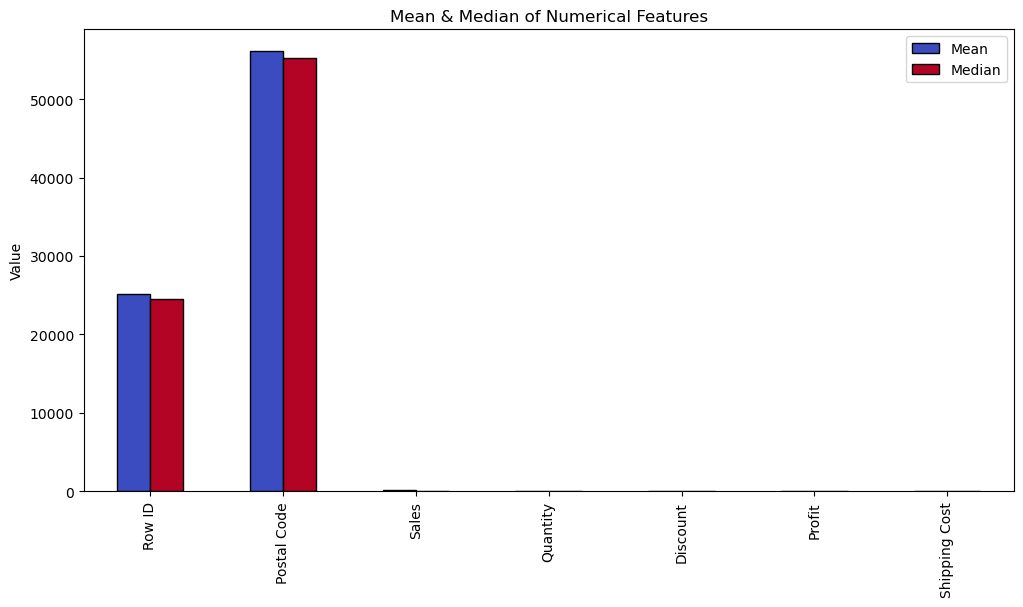

In [8]:
num_cols = df.select_dtypes(include=[np.number])
stats_df = pd.DataFrame({
    "Mean": num_cols.mean(),
    "Median": num_cols.median()
})

plt.figure(figsize=(12, 6))
stats_df[["Mean", "Median"]].plot(kind="bar", figsize=(12, 6), colormap="coolwarm", edgecolor="black")
plt.title("Mean & Median of Numerical Features")
plt.xticks(rotation=90)
plt.ylabel("Value")
plt.show()

#### A correlation matrix is calculated to show relationships between numerical variables. It helps identify positive or negative correlations, revealing how features influence each other.

In [9]:
correlation_matrix = df.corr()
print(correlation_matrix)

                 Row ID  Postal Code     Sales  Quantity  Discount    Profit  \
Row ID         1.000000     0.060158 -0.080979 -0.211053  0.091706 -0.040848   
Postal Code    0.060158     1.000000  0.001148  0.018538 -0.042565  0.008307   
Sales         -0.080979     0.001148  1.000000  0.292007 -0.119923  0.431352   
Quantity      -0.211053     0.018538  0.292007  1.000000 -0.028162  0.107512   
Discount       0.091706    -0.042565 -0.119923 -0.028162  1.000000 -0.453304   
Profit        -0.040848     0.008307  0.431352  0.107512 -0.453304  1.000000   
Shipping Cost -0.069672     0.000734  0.811216  0.246215 -0.104228  0.357693   

               Shipping Cost  
Row ID             -0.069672  
Postal Code         0.000734  
Sales               0.811216  
Quantity            0.246215  
Discount           -0.104228  
Profit              0.357693  
Shipping Cost       1.000000  


C:\Users\User\AppData\Local\Temp\ipykernel_14868\2020863294.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


### 4. Data Visualization:

#### Histograms are plotted to visualize the distribution of numerical features, helping identify patterns, skewness, and the spread of data.

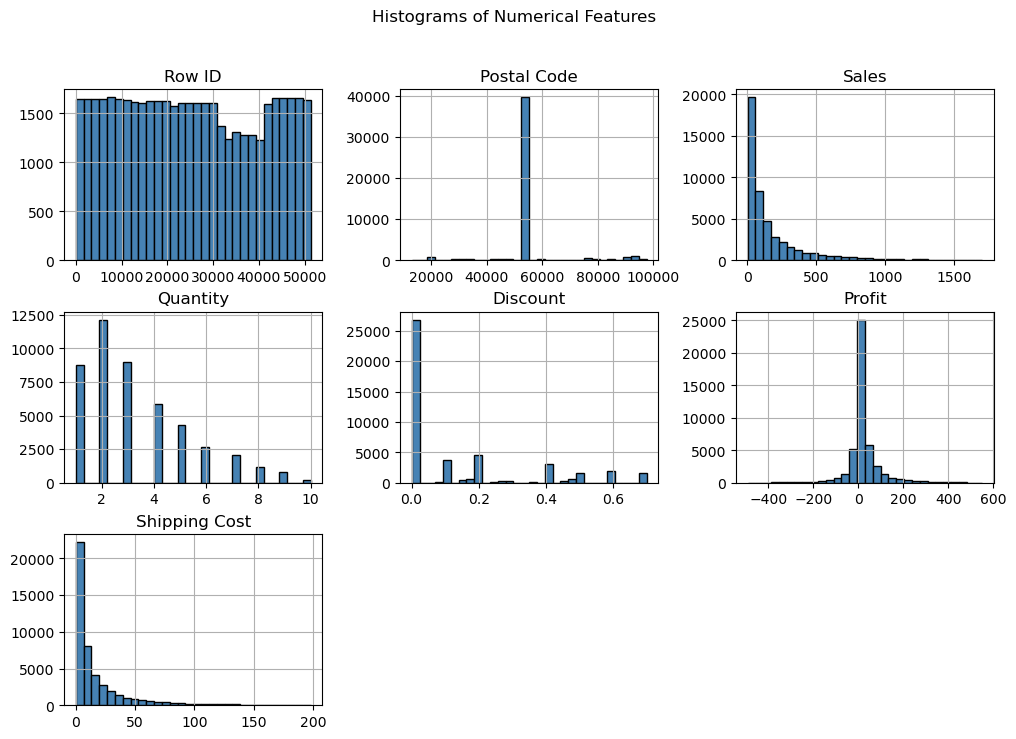

In [10]:
df.hist(figsize=(12, 8), bins=30, edgecolor="black", color="steelblue")
plt.suptitle("Histograms of Numerical Features")
plt.show()

#### A boxplot is used to visualize the spread and outliers in numerical features, helping detect extreme values and understand data distribution.

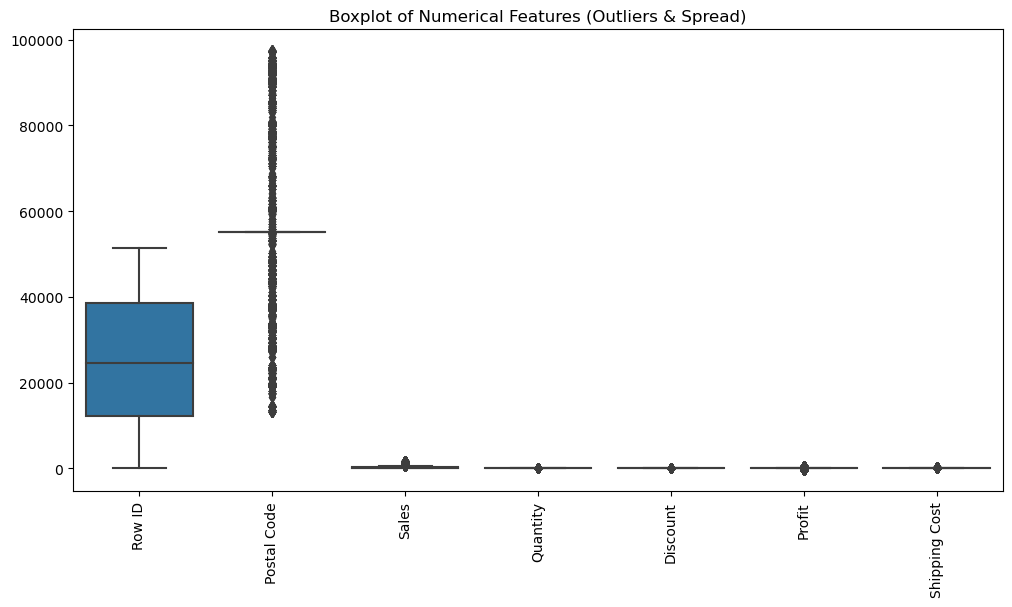

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=[float, int]))
plt.xticks(rotation=90)
plt.title("Boxplot of Numerical Features (Outliers & Spread)")
plt.show()

#### A heatmap visually represents the correlation matrix, showing relationships between numerical features. Darker or lighter shades indicate stronger positive or negative correlations.

C:\Users\User\AppData\Local\Temp\ipykernel_14868\4005589214.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)


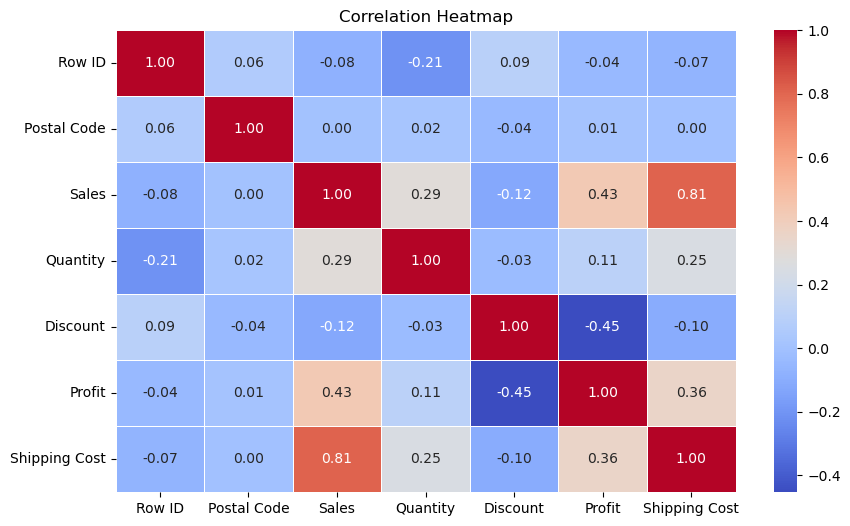

In [12]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

#### Pairplots display scatter plots for numerical features, helping visualize relationships and trends between variables.

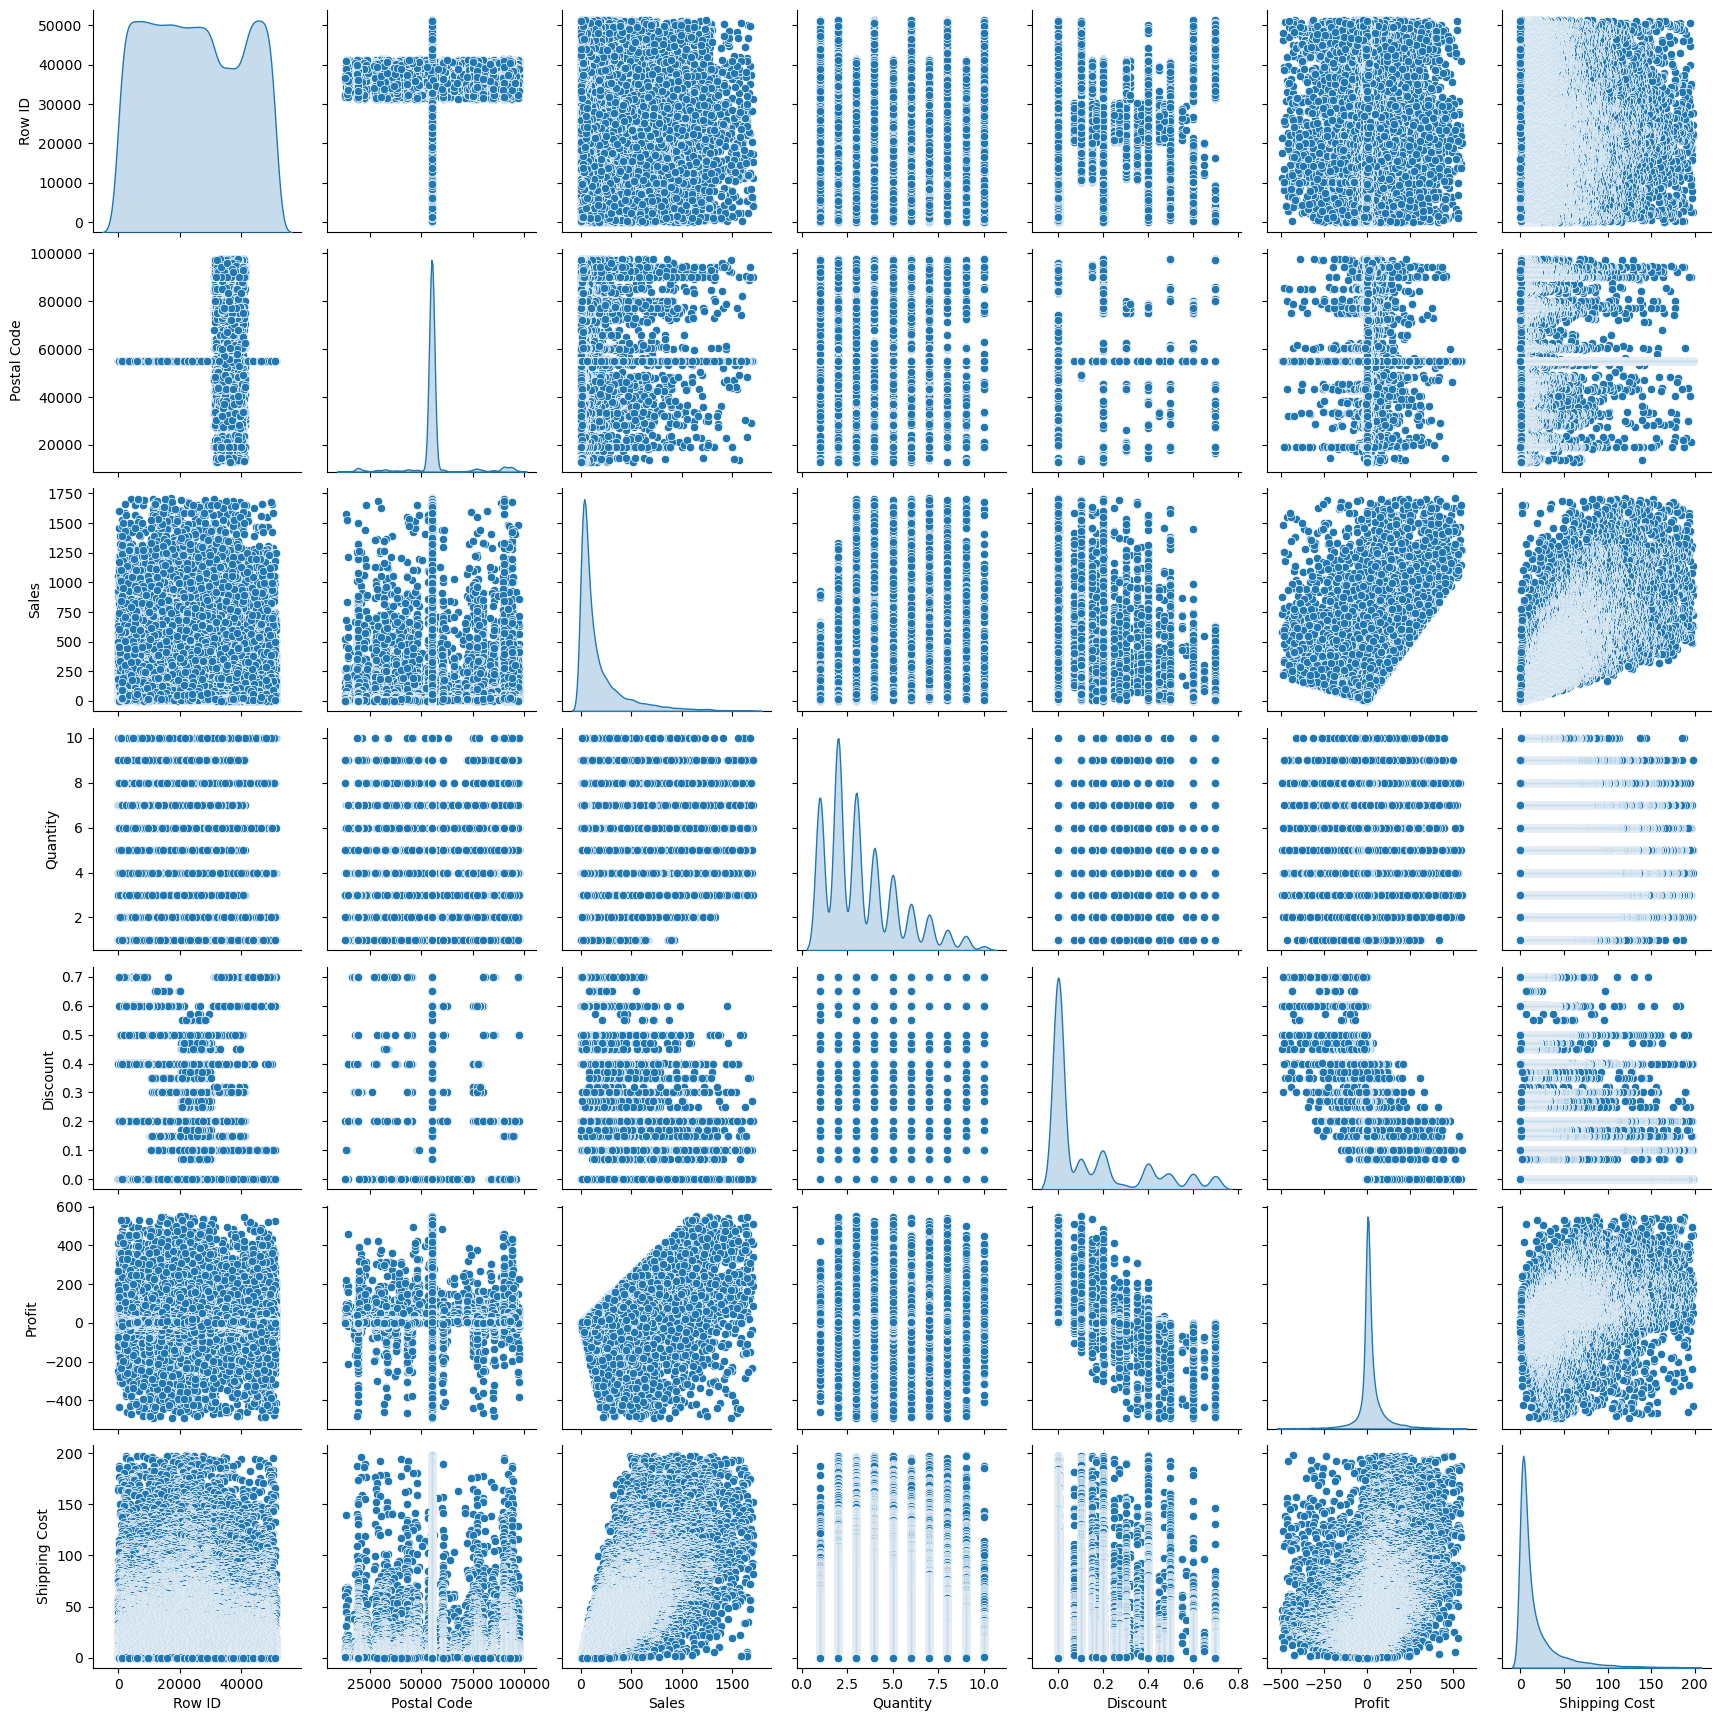

In [13]:
sns.pairplot(df.select_dtypes(include=[float, int]), diag_kind="kde")
plt.show()

#### A pie chart is used to show the distribution of different categories, displaying their proportion in the dataset with percentage labels.

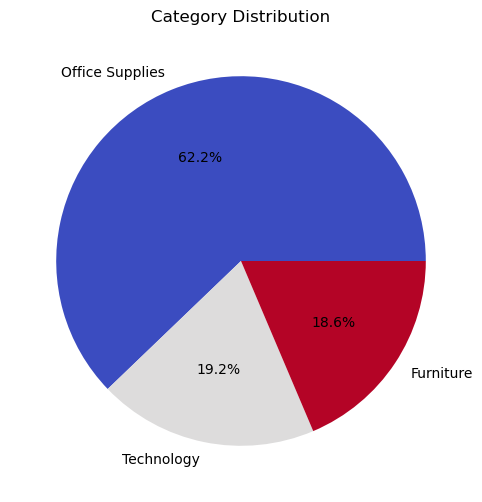

In [14]:
df["Category"].value_counts().plot.pie(autopct="%1.1f%%", figsize=(6, 6), cmap="coolwarm")
plt.title("Category Distribution")
plt.ylabel("")  
plt.show()